<a href="https://colab.research.google.com/github/davo300/AI-Research-Paper/blob/main/BayesianLogisticRegression_PyMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import pymc as pm
import arviz as az
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("sample_data/Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Basic cleaning
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()

# Encode categorical
df["Sex"] = (df["Sex"] == "male").astype(int)

X = df[["Pclass", "Sex", "Age", "Fare"]].values
y = df["Survived"].values

# Standardize
X = (X - X.mean(axis=0)) / X.std(axis=0)


In [ ]:
with pm.Model() as bayesian_logistic_model:

    # ----- Priors -----
    intercept = pm.Normal("intercept", mu=0, sigma=1)

    coefficients = pm.Normal(
        "coefficients",
        mu=0,
        sigma=1,
        shape=X.shape[1]
    )

    # ----- Linear model -----
    logits = intercept + pm.math.dot(X, coefficients)

    # ----- Likelihood -----
    p = pm.Deterministic("p", pm.math.sigmoid(logits))

    y_obs = pm.Bernoulli(
        "y_obs",
        p=p,
        observed=y
    )


In [ ]:
with bayesian_logistic_model:
    trace = pm.sample(
        draws=2000,
        tune=1000,
        target_accept=0.9,
        return_inferencedata=True,
        random_seed=42
    )


Output()

In [ ]:
az.summary(trace, hdi_prob=0.95)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
coefficients[0],-1.039,0.131,-1.285,-0.773,0.002,0.002,3707.0,3291.0,1.0
coefficients[1],-1.204,0.098,-1.405,-1.018,0.002,0.002,3716.0,2766.0,1.0
coefficients[2],-0.524,0.112,-0.730,-0.299,0.002,0.002,4036.0,2843.0,1.0
coefficients[3],0.049,0.122,-0.189,0.283,0.002,0.002,4106.0,2857.0,1.0
intercept,-0.514,0.097,-0.696,-0.321,0.001,0.002,4690.0,3095.0,1.0
...,...,...,...,...,...,...,...,...,...
p[709],0.447,0.052,0.345,0.546,0.001,0.001,3784.0,3091.0,1.0
p[710],0.259,0.027,0.209,0.313,0.000,0.000,4532.0,3165.0,1.0
p[711],0.950,0.014,0.924,0.977,0.000,0.000,3482.0,3153.0,1.0
p[712],0.558,0.054,0.454,0.664,0.001,0.001,4268.0,3258.0,1.0


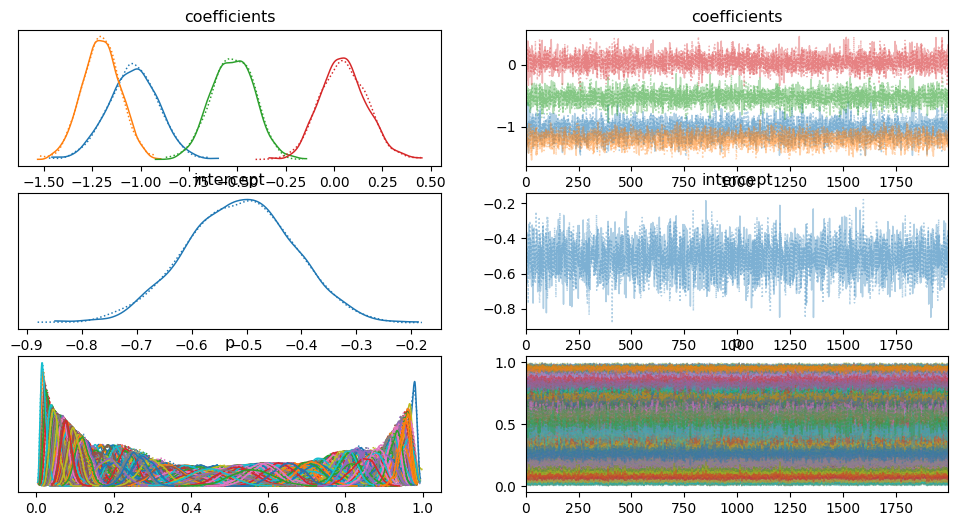

In [ ]:
az.plot_trace(trace)
plt.show()
